# Intro to PyTorch

This notebook teaches you the basics of:
1. Tensors
2. Datasets
3. Models
4. Training loop

## 1. What is a Tensor?

A Tensor is a multi-dimensional array, just like a NumPy array. For example,
- A scalar like 9.7 is a 0-dimensional tensor
- A vector like [9.7, -2.1, 7.3] is a 1-dimensional tensor
- A matrix like [[1, 2, 3], [4, 5, 6]] is a 2-dimensional tensor
- Anything with more dimensions we simply call a D-dimensional tensor

We instantiate tensors like so:

In [1]:
import torch

# Scalar
t1 = torch.tensor(4.)
print(t1)

# Vector
t2 = torch.tensor([1., 2., 3., 4.])

# Matrix
t3 = torch.tensor([
    [5, 6],
    [7, 8],
    [9, 10]
])

# 3-dimensional array
t4 = torch.tensor([
    [
        [1, 2, 3],
        [4, 5, 6]
    ],
    [
        [7, 8, 9],
        [10, 11, 12]
    ]
])

print(t1, t2, t3, t4)

tensor(4.)
tensor(4.) tensor([1., 2., 3., 4.]) tensor([[ 5,  6],
        [ 7,  8],
        [ 9, 10]]) tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


PyTorch tensors behave almost identically to NumPy arrays. For example, the following behaves just like you'd expect:

In [2]:
x = torch.arange(100).reshape((10, 10))
x

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [3]:
x * 5

tensor([[  0,   5,  10,  15,  20,  25,  30,  35,  40,  45],
        [ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95],
        [100, 105, 110, 115, 120, 125, 130, 135, 140, 145],
        [150, 155, 160, 165, 170, 175, 180, 185, 190, 195],
        [200, 205, 210, 215, 220, 225, 230, 235, 240, 245],
        [250, 255, 260, 265, 270, 275, 280, 285, 290, 295],
        [300, 305, 310, 315, 320, 325, 330, 335, 340, 345],
        [350, 355, 360, 365, 370, 375, 380, 385, 390, 395],
        [400, 405, 410, 415, 420, 425, 430, 435, 440, 445],
        [450, 455, 460, 465, 470, 475, 480, 485, 490, 495]])

There are a couple of important things to note here. This is also the cause of many errors in machine learning.

The first is dtype. dtype is the data type. This is just like a type in a traditional programming language, like float or int or long.

In [4]:
torch.tensor([1, 2, 3], dtype=torch.int64)

tensor([1, 2, 3])

In [5]:
torch.tensor([1, 2, 3], dtype=torch.float32)

tensor([1., 2., 3.])

You can change the dtype of tensors with the `.to` method.

In [6]:
x = torch.arange(10)
print(x, x.dtype)

y = x.to(torch.float32)
print(y, y.dtype)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) torch.int64
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]) torch.float32


The second thing to note about a tensor is the device. This is the device the tensor is stored on. One device is the CPU. The other device--if you have one--is the GPU.

You want to use the GPU for training because it performs operations in parallel. Colab has a GPU, which you can select in the runtime.

Tensors are loaded on the CPU by default.

In [8]:
x.device

device(type='cpu')

To move to the GPU, use `.to(device="cuda")`.

In [9]:
x.to(device="cuda")

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Oftentimes, you want to make your code device-agnostic. That means it will run regardless of whether the user has a GPU or not. Doing this is a single line.

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
x.to(device=device).device

device(type='cpu')

If one tensor is on the CPU and another is on the GPU, and you try to perform an operation between them, you will encounter an error. You must move tensors to the same device before doing this.

In [10]:
x = torch.arange(10)
y = torch.arange(10, device="cuda")

x + y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

## 2. What is a Dataset?

To train models, you need data. The collection of data is called a dataset. Datasets are composed of tensors.

To fully understand how datasets work, we will be creating our own dataset, rather than working with well known ones such as MNIST.

Dataset is a class in PyTorch which allows for easy data manipulation and loading.

Custom Datasets are useful when dealing with *non standard* formats or when you need to perform specific preprocessing steps.

In [113]:
from torch.utils.data import Dataset


class QuadraticDataset(Dataset):
    def __init__(self):
        self.x = torch.linspace(-10, 10, 1000).reshape((1000, 1))
        self.y = self.x ** 2

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

\_\_len__(self): returns the length of the x array, indicating how many data points we have in our dataset.

\_\_getitem__(self, idx): allows us to retrieve point coordinates given a specific index.

In [114]:
from matplotlib import pyplot as plt

# Create an instance of QuadraticDataset
quadratic_dataset = QuadraticDataset()

# Iterates through dataset and prints x, y values
for x, y in quadratic_dataset:
    print(x, y)

tensor([-10.]) tensor([100.])
tensor([-9.9800]) tensor([99.6000])
tensor([-9.9600]) tensor([99.2008])
tensor([-9.9399]) tensor([98.8024])
tensor([-9.9199]) tensor([98.4048])
tensor([-9.8999]) tensor([98.0080])
tensor([-9.8799]) tensor([97.6120])
tensor([-9.8599]) tensor([97.2168])
tensor([-9.8398]) tensor([96.8224])
tensor([-9.8198]) tensor([96.4289])
tensor([-9.7998]) tensor([96.0361])
tensor([-9.7798]) tensor([95.6441])
tensor([-9.7598]) tensor([95.2529])
tensor([-9.7397]) tensor([94.8625])
tensor([-9.7197]) tensor([94.4730])
tensor([-9.6997]) tensor([94.0842])
tensor([-9.6797]) tensor([93.6962])
tensor([-9.6597]) tensor([93.3090])
tensor([-9.6396]) tensor([92.9227])
tensor([-9.6196]) tensor([92.5371])
tensor([-9.5996]) tensor([92.1523])
tensor([-9.5796]) tensor([91.7683])
tensor([-9.5596]) tensor([91.3852])
tensor([-9.5395]) tensor([91.0028])
tensor([-9.5195]) tensor([90.6213])
tensor([-9.4995]) tensor([90.2405])
tensor([-9.4795]) tensor([89.8605])
tensor([-9.4595]) tensor([89.4814]

Additionally, we can visualize our dataset to ensure it behaves the way we expect it to.

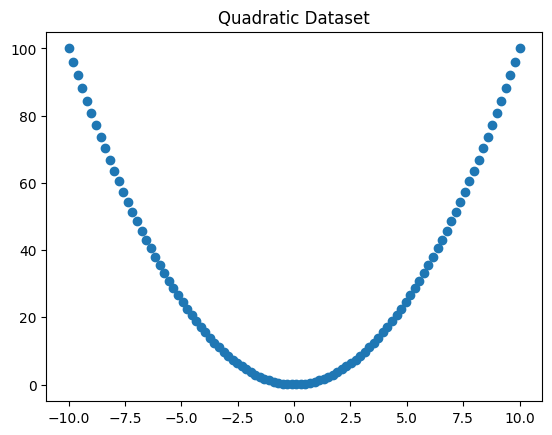

In [112]:
# Visualize the Dataset
plt.scatter(quadratic_dataset.x, quadratic_dataset.y)
plt.title('Quadratic Dataset')
plt.show()

We want to instantiate a DataLoader object. A DataLoader facilitates efficient data handlint by *batching*, *shuffling* and *parallel loading*.

In [115]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4

dataloader = DataLoader(quadratic_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [54]:
for xb, yb in dataloader:
  print(xb, yb)

tensor([[-8.7879],
        [-8.9899],
        [-5.1515],
        [ 9.3939]]) tensor([[77.2268],
        [80.8183],
        [26.5381],
        [88.2461]])
tensor([[ 7.5758],
        [-0.7071],
        [ 9.7980],
        [-4.7475]]) tensor([[57.3921],
        [ 0.4999],
        [96.0004],
        [22.5385]])
tensor([[ 4.1414],
        [-3.1313],
        [ 9.5960],
        [ 7.7778]]) tensor([[17.1513],
        [ 9.8051],
        [92.0824],
        [60.4938]])
tensor([[-1.7172],
        [ 8.5859],
        [ 4.7475],
        [-6.5657]]) tensor([[ 2.9487],
        [73.7170],
        [22.5385],
        [43.1078]])
tensor([[5.5556],
        [3.3333],
        [6.7677],
        [3.1313]]) tensor([[30.8642],
        [11.1111],
        [45.8014],
        [ 9.8051]])
tensor([[ 3.7374],
        [-1.5152],
        [ 2.3232],
        [-1.9192]]) tensor([[13.9680],
        [ 2.2957],
        [ 5.3974],
        [ 3.6833]])
tensor([[ 1.3131],
        [ 9.1919],
        [-7.3737],
        [ 1.9192]]) ten

# 3. Models

Now for the fun part! We have a dataset of corresponding inputs and outputs. We now define a model that we can run on an input to produce an output.

In PyTorch, models are defined using `nn.Module`.

In [116]:
from torch import nn


class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 1)
        self.act2 = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.act1(out)
        out = self.fc2(out)
        out = self.act2(out)
        return out

In [117]:
model = MyModel()

We can move models onto the GPU using `.to(device="cuda")` just like with tensors.

In [118]:
model = model.to(device="cuda")

Let's test our model.

In [119]:
x = torch.tensor([5.]).to(device="cuda")
model(x)

tensor([0.8511], device='cuda:0', grad_fn=<ReluBackward0>)

It gives us garbage, because we need to train it. Let's train it.

# 4. Training Loop

To train the model, we need a few things:
- A loss function, which tells us how well is the model is performing
- An optimizer, which adjusts the model parameters to minimize the loss

In [120]:
LEARNING_RATE = 1e-3
NUM_EPOCHS = 100

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # Typically use Adam in practice

In [122]:
from tqdm import tqdm


epoch_losses = []

for epoch in tqdm(range(NUM_EPOCHS)):
    epoch_loss = 0

    for Xb, yb in dataloader:
        y_pred = model(Xb.to(device="cuda"))
        loss = loss_fn(y_pred, yb.to(device="cuda"))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += loss.item()

    epoch_losses.append(epoch_loss / len(dataloader))

100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


Let's view our losses:

Text(0, 0.5, 'Loss')

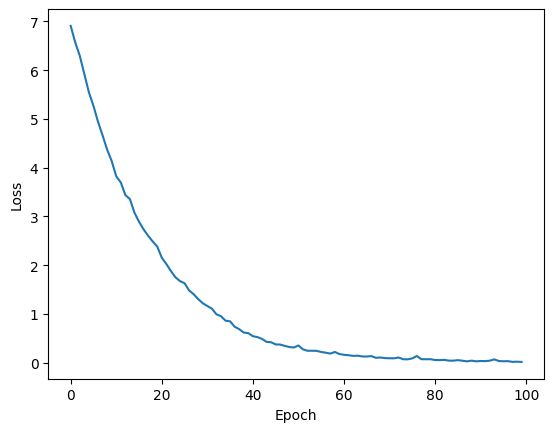

In [123]:
import numpy as np

plt.plot(np.arange(NUM_EPOCHS), epoch_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

Let's test on a sample input.

In [124]:
x = input("Enter a number to evaluate: ")
x = torch.tensor([float(x)]).to(device="cuda")

model(x)

Enter a number to evaluate: 5


tensor([24.9268], device='cuda:0', grad_fn=<ReluBackward0>)